In [ ]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageFilter
from google.colab.patches import cv2_imshow

In [ ]:
img1=cv2.imread("/content/1.png")
img2=cv2.imread("/content/2.png")
img3=cv2.imread("/content/3.png")
img4=cv2.imread("/content/4.png")
img5=cv2.imread("/content/5.png")
img6=cv2.imread("/content/6.jpg")
img_boat=cv2.imread("/content/boat.jpg")

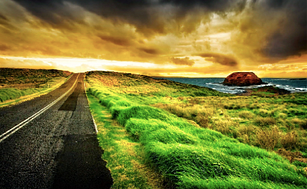

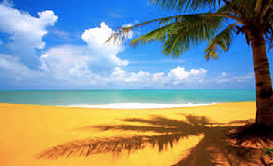

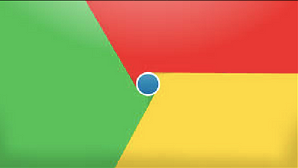

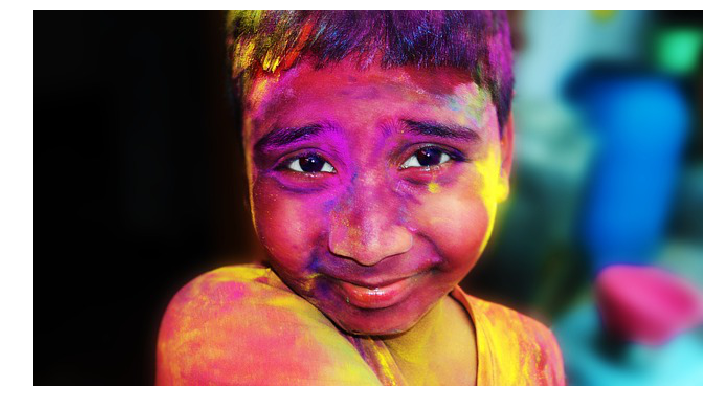

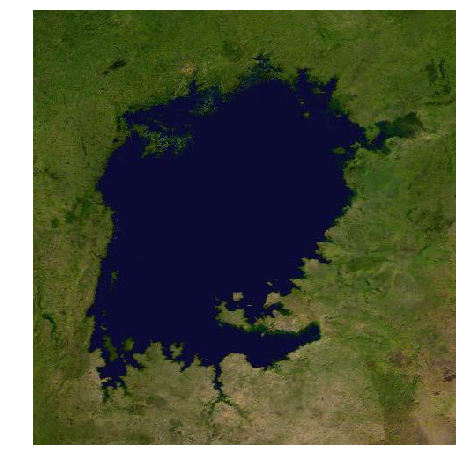

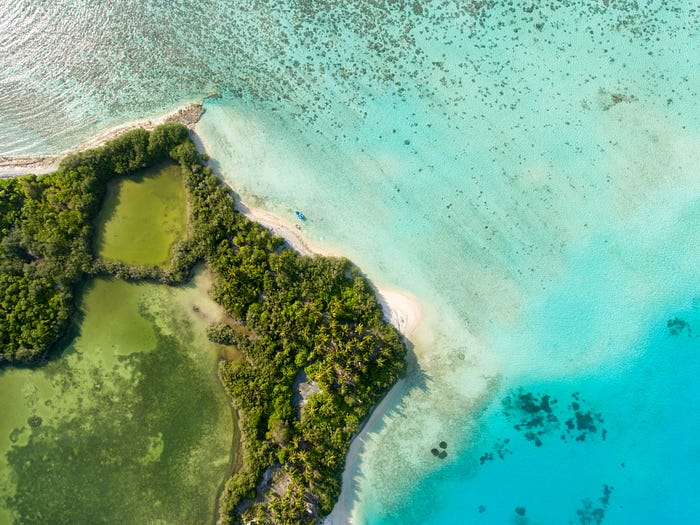

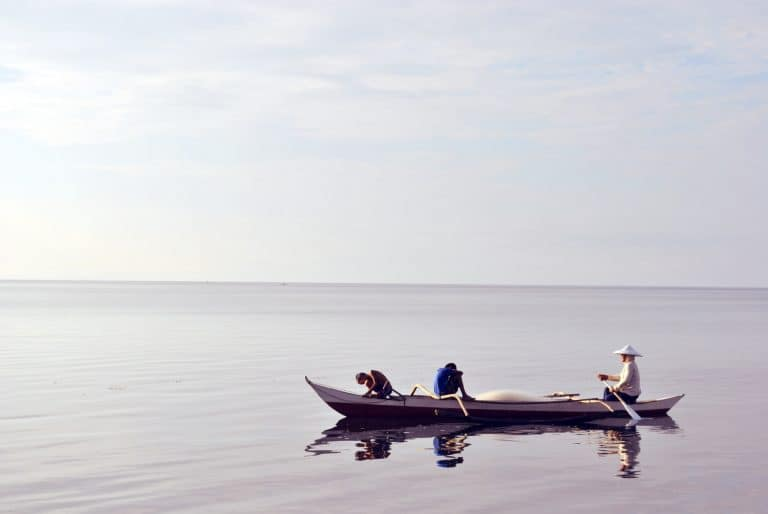

In [ ]:
cv2_imshow(img1)
cv2_imshow(img2)
cv2_imshow(img3)
cv2_imshow(img4)
cv2_imshow(img5)
cv2_imshow(img6)
cv2_imshow(img_boat)

**K-means**

In [ ]:
def k_means_segmentation(image, k_values):
    # Normalize pixel values to the range [0, 1]
    image_normalized = image.astype(np.float32) / 255.0

    flattened_image = image_normalized.reshape((-1, 3))

    plt.figure(figsize=(15, 5))
    plt.subplot(1, len(k_values) + 1, 1)
    plt.imshow(image_normalized[:, :, ::-1])
    plt.title('Original Image')

    for i, k in enumerate(k_values):
        criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
        _, labels, centers = cv2.kmeans(flattened_image, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

        segmented_image = centers[labels.flatten()].reshape(image_normalized.shape)

        plt.subplot(1, len(k_values) + 1, i + 2)
        plt.imshow(segmented_image[:, :, ::-1])
        plt.title(f'K = {k}')

    plt.show()


In [ ]:
k_values = [2, 4, 6]

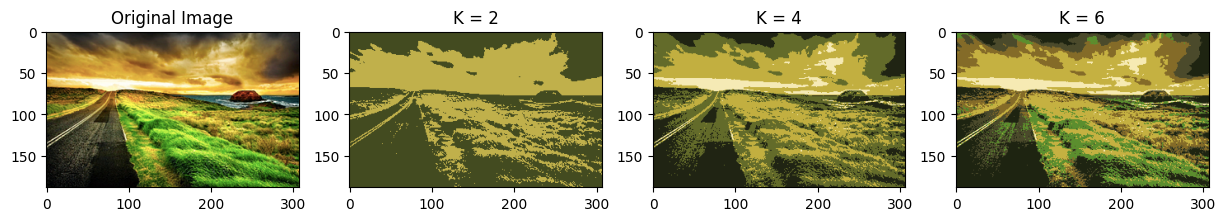

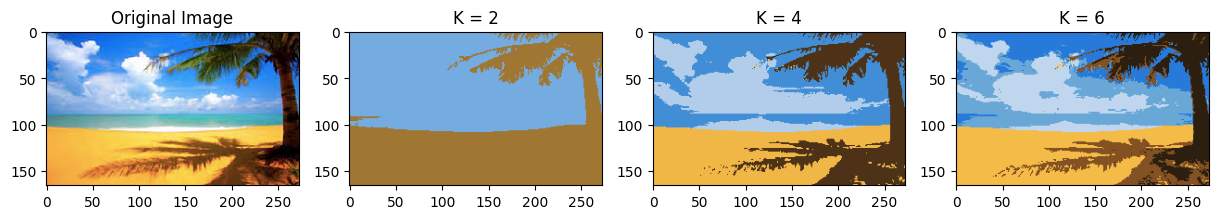

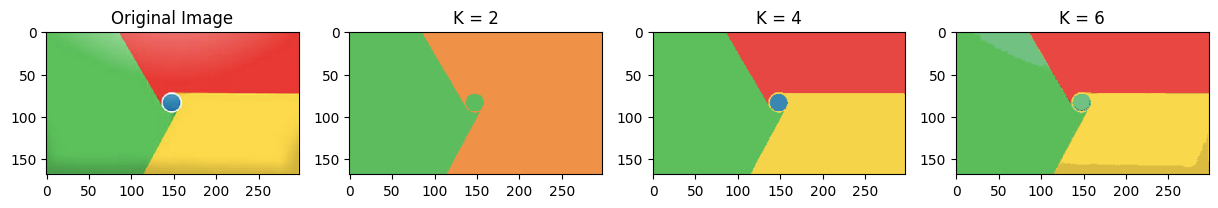

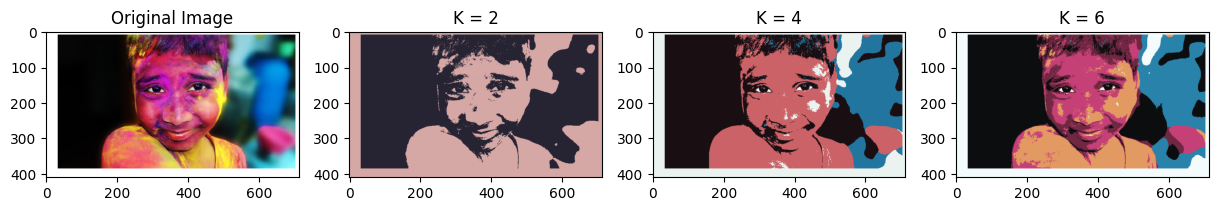

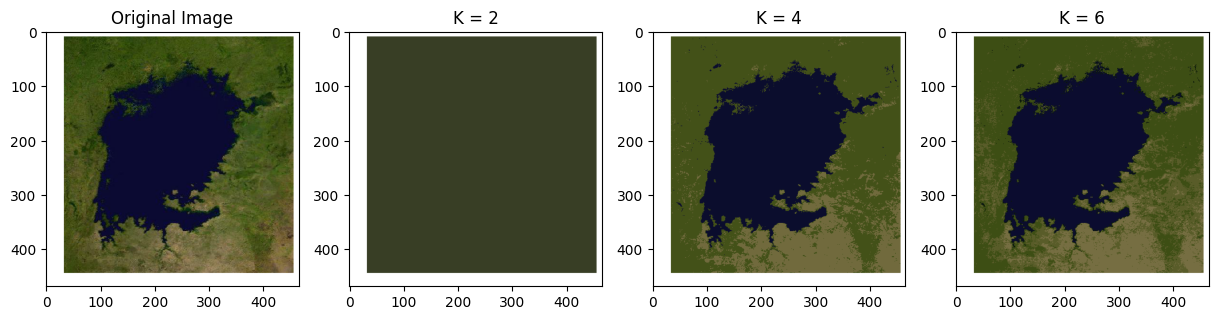

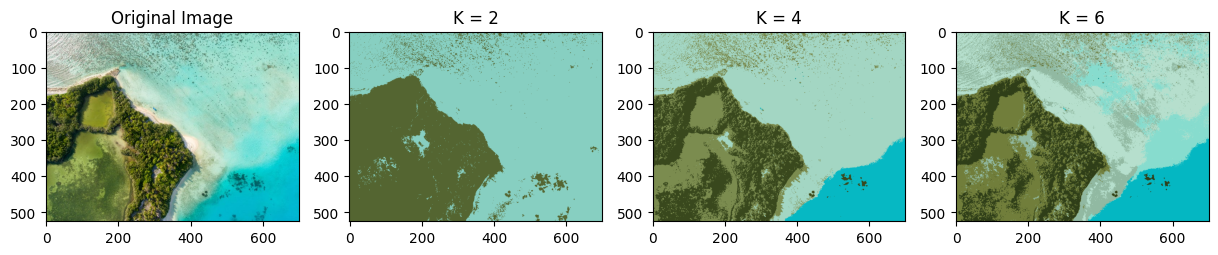

In [ ]:
k_means_segmentation(img1, k_values)
k_means_segmentation(img2, k_values)
k_means_segmentation(img3, k_values)
k_means_segmentation(img4, k_values)
k_means_segmentation(img5, k_values)
k_means_segmentation(img6, k_values)

**Otsu Method**

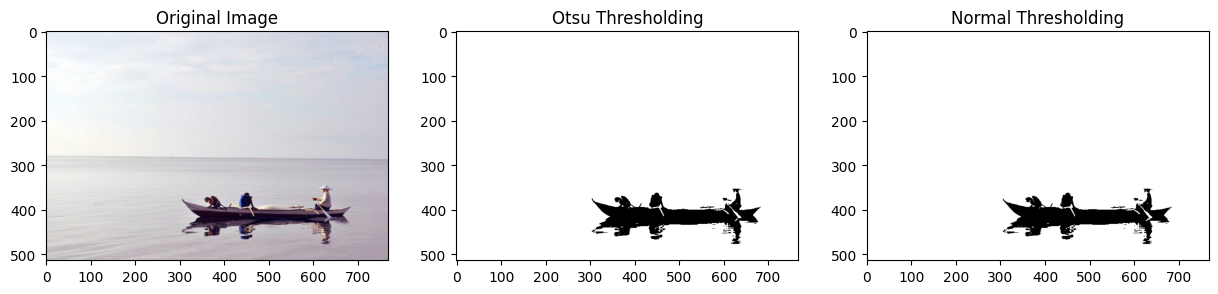

In [ ]:
# Convert the image to grayscale
gray_img_boat = cv2.cvtColor(img_boat, cv2.COLOR_BGR2GRAY)

# Otsu's thresholding
_, otsu_result = cv2.threshold(gray_img_boat, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Normal thresholding
_, normal_result = cv2.threshold(gray_img_boat, 127, 255, cv2.THRESH_BINARY)

# Display the original, Otsu thresholded, and normal thresholded images
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(img_boat, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(otsu_result, cmap='gray')
plt.title('Otsu Thresholding')

plt.subplot(1, 3, 3)
plt.imshow(normal_result, cmap='gray')
plt.title('Normal Thresholding')

plt.show()
